In [0]:
# fastai 0.7.0
!mkdir src -p && cd src && git clone https://github.com/fastai/fastai.git
!pip3 install -U pillow==4.1.1
!pip3 install -q bcolz graphviz sklearn_pandas isoweek pandas_summary ipywidgets torch torchvision torchtext pillow

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# fastai 0.7.0
import sys
sys.path.append("/content/src/fastai/old") # on windows use \'s instead

from fastai.conv_learner import *
from fastai.dataset import *
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

print(torch.__version__)
torch.backends.cudnn.benchmark=True
torch.cuda.is_available(), torch.backends.cudnn.enabled

1.0.0


(True, True)

## Pascal VOC 2007

In [0]:
PATH = Path('data')
os.makedirs(PATH, exist_ok=True)

In [0]:
!cd {PATH} && curl --header "Host: host.robots.ox.ac.uk" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.62 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header "Accept-Language: zh,zh-CN;q=0.9,zh-TW;q=0.8,en-US;q=0.7,en;q=0.6" --header "Referer: http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html" "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar" -o "VOCtrainval_11-May-2012.tar" -L
!cd {PATH} && tar xf VOCtrainval_11-May-2012.tar
!find {PATH} -type d

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1907M  100 1907M    0     0  78.8M      0  0:00:24  0:00:24 --:--:-- 84.6M
data
data/VOCdevkit
data/VOCdevkit/VOC2012
data/VOCdevkit/VOC2012/ImageSets
data/VOCdevkit/VOC2012/ImageSets/Layout
data/VOCdevkit/VOC2012/ImageSets/Segmentation
data/VOCdevkit/VOC2012/ImageSets/Main
data/VOCdevkit/VOC2012/ImageSets/Action
data/VOCdevkit/VOC2012/JPEGImages
data/VOCdevkit/VOC2012/SegmentationObject
data/VOCdevkit/VOC2012/SegmentationClass
data/VOCdevkit/VOC2012/Annotations


In [0]:
!ls {PATH}/VOCdevkit/VOC2007/JPEGImages | head -5

ls: cannot access 'data/VOCdevkit/VOC2007/JPEGImages': No such file or directory


In [0]:
!ls {PATH}/VOCdevkit/VOC2007/Annotations | head -5

ls: cannot access 'data/VOCdevkit/VOC2007/Annotations': No such file or directory


In [0]:
!cd {PATH} && wget -q https://storage.googleapis.com/coco-dataset/external/PASCAL_VOC.zip
!cd {PATH} && unzip -q PASCAL_VOC.zip
list((PATH/'PASCAL_VOC/').iterdir())

[PosixPath('data/PASCAL_VOC/pascal_val2012.json'),
 PosixPath('data/PASCAL_VOC/pascal_train2007.json'),
 PosixPath('data/PASCAL_VOC/pascal_test2007.json'),
 PosixPath('data/PASCAL_VOC/pascal_train2012.json'),
 PosixPath('data/PASCAL_VOC/pascal_val2007.json')]

In [0]:
JPEG_PATH = 'VOCdevkit/VOC2012/JPEGImages'
IMG_PATH = PATH/JPEG_PATH
METADATA_PATH = PATH/'PASCAL_VOC'

In [0]:
trn_json = json.load((METADATA_PATH/'pascal_train2012.json').open())
val_json = json.load((METADATA_PATH/'pascal_val2012.json').open())
trn_json.keys(), val_json.keys()

(dict_keys(['images', 'type', 'annotations', 'categories']),
 dict_keys(['images', 'type', 'annotations', 'categories']))

## EDA

In [0]:
i = 0

print("images:")
display(val_json['images'][i])
print("\nannotations:")
display(val_json['annotations'][i])
print("\ncategories:")
display(val_json['categories'][i])
print("\ntype:")
display(val_json['type'][i])

images:


{'file_name': '2008_000002.jpg', 'height': 375, 'id': 2008000002, 'width': 500}


annotations:


{'area': 117445,
 'bbox': [33, 10, 415, 283],
 'category_id': 20,
 'id': 1,
 'ignore': 0,
 'image_id': 2008000002,
 'iscrowd': 0,
 'segmentation': [[33, 10, 33, 293, 448, 293, 448, 10]]}


categories:


{'id': 1, 'name': 'aeroplane', 'supercategory': 'none'}


type:


'i'

In [0]:
display(val_json['annotations'][:5])

[{'area': 117445,
  'bbox': [33, 10, 415, 283],
  'category_id': 20,
  'id': 1,
  'ignore': 0,
  'image_id': 2008000002,
  'iscrowd': 0,
  'segmentation': [[33, 10, 33, 293, 448, 293, 448, 10]]},
 {'area': 146965,
  'bbox': [45, 10, 455, 323],
  'category_id': 19,
  'id': 2,
  'ignore': 0,
  'image_id': 2008000003,
  'iscrowd': 0,
  'segmentation': [[45, 10, 45, 333, 500, 333, 500, 10]]},
 {'area': 1188,
  'bbox': [61, 189, 22, 54],
  'category_id': 15,
  'id': 3,
  'ignore': 0,
  'image_id': 2008000003,
  'iscrowd': 0,
  'segmentation': [[61, 189, 61, 243, 83, 243, 83, 189]]},
 {'area': 27392,
  'bbox': [0, 229, 428, 64],
  'category_id': 4,
  'id': 4,
  'ignore': 0,
  'image_id': 2008000007,
  'iscrowd': 0,
  'segmentation': [[0, 229, 0, 293, 428, 293, 428, 229]]},
 {'area': 4758,
  'bbox': [216, 160, 78, 61],
  'category_id': 10,
  'id': 5,
  'ignore': 0,
  'image_id': 2008000009,
  'iscrowd': 0,
  'segmentation': [[216, 160, 216, 221, 294, 221, 294, 160]]}]

In [0]:
i2clas = {o['id']:o['name'] for o in val_json['categories']}
i2fn = {o['id']:o['file_name'] for o in val_json['images']}
fnames = [o['file_name'] for o in val_json['images']]

In [0]:
annos = collections.defaultdict(lambda: [])
for o in val_json['annotations']:
  if o['ignore'] == 0:
    annos[i2fn[o['image_id']]].append((o['bbox'], o['category_id']))
annos

In [0]:
def show_img(ax, fpath):
  im = open_image(IMG_PATH/fnames[i])
  ax.imshow(im)
  ax.axis('off')

In [0]:
def draw_outline(patch, lw):
  patch.set_path_effects([ patheffects.Stroke(linewidth=lw, foreground='black'), patheffects.Normal() ])
  
def draw_bbox(ax, bbox, color='white'):
  patch = ax.add_patch(patches.Rectangle(bbox[:2], *bbox[2:], fill=False, edgecolor=color, lw=2))
  draw_outline(patch, 2)
  
def draw_txt(ax, xy, txt, sz=14):
  text = ax.text(*xy, txt, fontsize=sz, color='white', weight='bold', verticalalignment='top')
  draw_outline(text, 1)

def show_bbox(ax, bb):
  for b, c in bb:
    draw_bbox(ax, b, )
    draw_txt(ax, b[:2], i2clas[c])

In [0]:
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
from cycler import cycler

def get_cmap(N):
  color_norm = mcolors.Normalize(0, N - 1)
  return cmx.ScalarMappable(color_norm, 'Set3').to_rgba

def show_bbox(ax, bb):
  for i, (b, c) in enumerate(bb):
    draw_bbox(ax, b, color=colors[i % NUM_COLORS])
    draw_txt(ax, b[:2], i2clas[c])
    
NUM_COLORS = 12
cmap = get_cmap(NUM_COLORS)
colors = [cmap(float(i)) for i in range(NUM_COLORS)]

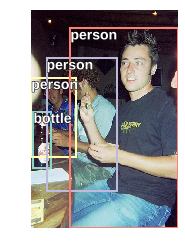

In [0]:
fig, ax = plt.subplots(figsize=(6, 4))
show_img(ax, fpath)
show_bbox(ax, annos[fnames[i]])

## Prepare Data

In [0]:
len(trn_json['images']), len(val_json['images'])

(5717, 5823)

In [0]:
def get_annos(ds):
  annos = collections.defaultdict(lambda: [])
  i2fn = {o['id']:o['file_name'] for o in ds['images']}
  i2clas = {o['id']:o['name'] for o in val_json['categories']}
  for o in ds['annotations']:
    if not o['ignore']:
      annos[i2fn[o['image_id']]].append((np.array(o['bbox']), i2clas[o['category_id']]))
  return annos

trn_annos = get_annos(trn_json)
val_annos = get_annos(val_json)
len(trn_annos), len(val_annos)

(5717, 5823)

In [0]:
# (y, x, y`, x`) -> (x, y, width, height) 
def from_bb(bb): return np.array([bb[1], bb[0], bb[3]-bb[1]+1, bb[2]-bb[0]+1])
# (x, y, width, height) -> (y, x, y`, x`)
def to_bb(bb): return np.array([bb[1], bb[0], bb[1]+bb[3]-1, bb[0]+bb[2]-1])

train_annos = {}
for k, v in trn_annos.items():
  train_annos[k] = v
for k, v in val_annos.items():
  train_annos[k] = v

fnames = []
bboxes = []
claz = []
val_idxs = []

for k, v in train_annos.items():
  fnames.append(k)
  bb, clas = [], []
  for b, c in v:
    bb.append(to_bb(b))
    clas.append(c)
  bboxes.append(' '.join([str(o) for o in np.concatenate(bb)]))
  claz.append(' '.join([str(o) for o in clas]))

train_df = pd.DataFrame({'fname': fnames, 'bounding box': bboxes, 'categories': claz},
                           columns=['fname', 'bounding box', 'categories'])
train_df.to_csv(PATH/'train_bbox.csv', index=False)
display(train_df.head())

# val_idxs
val_fnames = np.array([k for k, _ in val_annos.items()])
for i, o in enumerate(train_df.fname.values):
  if o in val_fnames: val_idxs.append(i)
val_idxs = np.array(val_idxs)
pickle.dump(val_idxs, open(PATH/'val_idxs.pkl', 'wb'))
val_idxs

fname                                       bounding box  \
0  2008_000008.jpg                       86 52 419 470 43 157 166 288   
1  2008_000015.jpg                         0 269 175 377 0 56 149 163   
2  2008_000019.jpg         1 138 196 371 65 164 235 317 0 360 111 479   
3  2008_000023.jpg  0 5 261 313 96 39 410 120 35 136 108 168 35 17...   
4  2008_000028.jpg                      198 157 239 230 201 46 237 93   

                              categories  
0                           horse person  
1                          bottle bottle  
2                            dog dog dog  
3  tvmonitor bottle person person person  
4                                car car

array([ 5717,  5718,  5719, ..., 11537, 11538, 11539])

In [0]:
train_df = pd.read_csv(PATH/'train_bbox.csv')
val_idxs = pickle.load(open(PATH/'val_idxs.pkl', 'rb'))
labels = np.unique(np.concatenate([o.split(' ') for o in train_df.categories.values]))
ltoi = {o:i for i, o in enumerate(labels)}
labels, len(labels)

(array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
        'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
       dtype='<U11'), 20)

## SSD

### Classification

In [0]:
train_df = pd.read_csv(PATH/'train_bbox.csv')
cols = ['fname', 'categories']
train_clas_df = train_df[cols].copy()
train_clas_df.to_csv(PATH/'train_clas.csv', index=False)
train_clas_df.head()

fname                             categories
0  2008_000008.jpg                           horse person
1  2008_000015.jpg                          bottle bottle
2  2008_000019.jpg                            dog dog dog
3  2008_000023.jpg  tvmonitor bottle person person person
4  2008_000028.jpg                                car car

In [0]:
arch = resnet34
sz = 224
bs = 64
tfms = tfms_from_model(arch, sz, crop_type=CropType.NO)
val_idxs = pickle.load(open(PATH/'val_idxs.pkl', 'rb'))
md = ImageClassifierData.from_csv(PATH, JPEG_PATH, PATH/'train_clas.csv', bs=bs, tfms=tfms, val_idxs=val_idxs)
md.c, np.array(md.classes)

(20,
 array(['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
        'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'],
       dtype='<U11'))

In [0]:
learn = ConvLearner.pretrained(arch, md)
learn.opt_fn = optim.Adam

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 92172642.34it/s]


epoch      trn_loss   val_loss   <lambda>   
    0      1.059341   5.087902   0.815585  



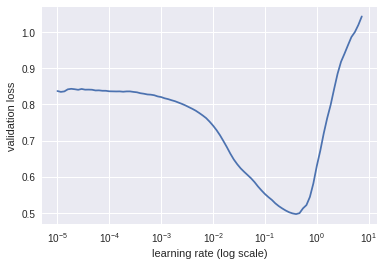

In [0]:
learn.lr_find()
learn.sched.plot(0, 0)

In [0]:
lr = 1e-2
learn.fit(lr, 1, cycle_len=5, use_clr=(20, 5))
learn.save('clas')

epoch      trn_loss   val_loss   <lambda>   
    0      0.209789   0.082015   0.971578  
    1      0.105096   0.07692    0.973321  
    2      0.081515   0.075133   0.974068  
    3      0.070129   0.073762   0.974352  
    4      0.060756   0.073015   0.974515  



In [0]:
x,y = next(iter(md.val_dl))
yp = predict_batch(learn.model, x)
ima = md.val_ds.denorm(x)

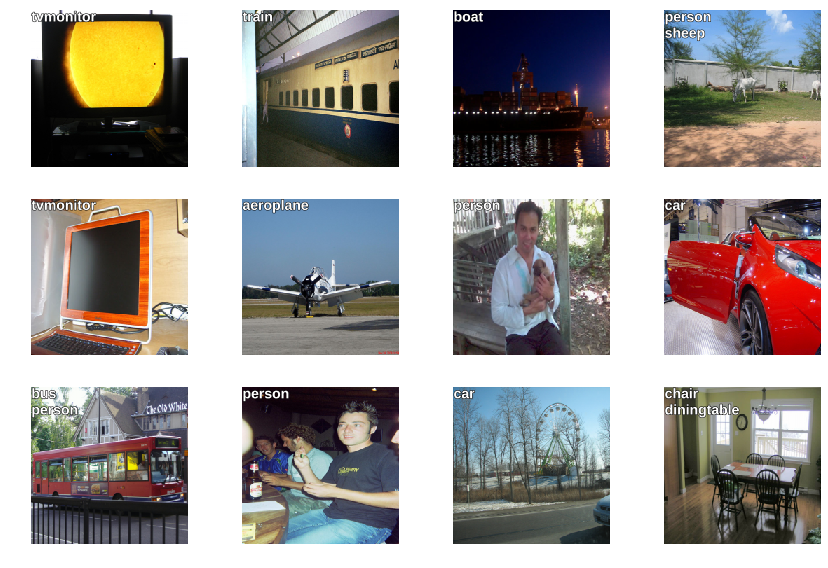

In [0]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ya = np.nonzero(yp[i]>0.4)[:, 0]
    b = '\n'.join(md.classes[o] for o in to_np(ya))
    ax.imshow(ima[i])
    draw_txt(ax, (0,0), b)
    ax.axis('off')
plt.tight_layout()

### Groud Truth

In [0]:
train_df = pd.read_csv(PATH/'train_bbox.csv')
claz = np.array([np.array([ltoi[p] for p in o.split(' ')]) for o in train_df.categories.values])
claz

array([array([12, 14]), array([4, 4]), array([11, 11, 11]), ..., array([6]), array([4]), array([0])],
      dtype=object)

In [0]:
arch = resnet34
sz = 224
bs = 64
aug_tfms = [
    RandomFlip(tfm_y=TfmType.COORD),
    RandomRotate(3, p=0.5, tfm_y=TfmType.COORD),
    RandomLighting(0.05, 0.05, tfm_y=TfmType.COORD)
]
tfms = tfms_from_model(arch, sz, aug_tfms=aug_tfms, crop_type=CropType.NO, tfm_y=TfmType.COORD)
val_idxs = pickle.load(open(PATH/'val_idxs.pkl', 'rb'))
md = ImageClassifierData.from_csv(PATH, JPEG_PATH, PATH/'train_bbox.csv', bs=bs, tfms=tfms,
                                  val_idxs=val_idxs, continuous=True, num_workers=10)

In [0]:
class ObjectDataset(Dataset):
  def __init__(self, ds, y):
    self.ds = ds
    self.y = y
  def __getitem__(self, i):
    xi, yi = self.ds[i]
    return (xi, (yi, self.y[i]))
  @property
  def c(self): return c
  @property
  def is_multi(self): return False
  @property
  def is_reg(self): return True
  @property
  def sz(self): return sz

((val_y, trn_y),) = split_by_idx(val_idxs, claz)
md.trn_dl.dataset = ObjectDataset(md.trn_ds, trn_y)
md.val_dl.dataset = ObjectDataset(md.val_ds, val_y)
len(val_y), len(trn_y)

(5823, 5717)

In [0]:
x, y = next(iter(md.val_dl))
ima = md.val_ds.ds.denorm(x)

In [0]:
i = 9
bb = y[0][i].view(-1, 4)
clas = y[1][i]
bb, clas, bb.shape, clas.shape

(tensor([[  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.],
         [105.,   4., 161.,  28.],
         [ 70.,   0., 149.,  66.],
         [ 50.,  24., 185., 129.],
         [ 19.,  60., 223., 222.]], device='cuda:0'),
 tensor([ 0,  0,  0,  4, 14, 14, 14], device='cuda:0'),
 torch.Size([7, 4]),
 torch.Size([7]))

In [0]:
def draw_gt(ax, box, clas=None, prob=None, num_classes=0, thresh=0.5):
  if clas is None: clas = [None] * box.shape[0]
  if prob is None: prob = [None] * box.shape[0]
  for i, (b, c, p) in enumerate(zip(box, clas, prob)):
    if b[2] > 0 and (p is None or p >= thresh):
      txt = f'{i}:'
      txt += ' bg' if c is None or c >= num_classes else labels[c]
      txt += '' if p is None else f' {p:.2f}'
      draw_bbox(ax, from_bb(b), color=colors[i % NUM_COLORS])
      draw_txt(ax, (b[1], b[0]), txt)

(-0.5, 223.5, 223.5, -0.5)

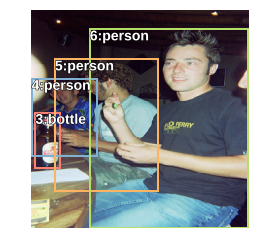

In [0]:
i = 9
fig, ax = plt.subplots(figsize=(6, 4))
ax.imshow(ima[i])
draw_gt(ax, y[0][i].view(-1, 4), y[1][i], num_classes=len(labels))
ax.axis('off')

### SSD Network Part 1

In [0]:
nf = 256
num_classes = len(labels)

def conv_layer(nin, nf, stride=2, drop=0.1):
  return nn.Sequential(
      nn.Conv2d(nin, nf, 3, stride, 1, bias=False),
      nn.ReLU(),
      nn.BatchNorm2d(nf),
      nn.Dropout(drop)
  )

class Outlayer(nn.Module):
  def __init__(self, nf, num_classes, bias):
    super().__init__()
    self.clas_conv = nn.Conv2d(nf, num_classes + 1, 3, 1, 1)
    self.bb_conv = nn.Conv2d(nf, 4, 3, 1, 1)
    self.clas_conv.bias.data.zero_().add_(bias)
    
  def flatten(self, x):
    bs, nf, w, h = x.size()
    x = x.permute(0, 2, 3, 1).contiguous()
    return x.view(bs, -1, nf)
  
  def forward(self, x):
    return [self.flatten(self.bb_conv(x)), self.flatten(self.clas_conv(x))]

class SSDHead(nn.Module):
  def __init__(self, num_classes, nf, bias, drop_i=0.25):
    super().__init__()
    self.conv1 = conv_layer(512, nf, stride=1)
    self.conv2 = conv_layer(nf, nf)
    self.drop_i = nn.Dropout(drop_i)
    self.out = Outlayer(nf, num_classes, bias=bias)
  
  def forward(self, x):
    x = self.drop_i(F.relu(x))
    x = self.conv1(x)
    x = self.conv2(x)
    return self.out(x)
  
ssd_head_f = SSDHead(num_classes, nf, bias=-3.)

In [0]:
learn = ConvLearner.pretrained(arch, md, custom_head=ssd_head_f)
learn.opt_fn = optim.Adam

In [0]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape

### Default Box

In [0]:
cells = 4
width = 1 / cells
cx = np.repeat(np.linspace(width / 2, 1 - (width / 2), cells), cells)
cy = np.tile(np.linspace(width / 2, 1 - (width / 2), cells), cells)
w = h = np.array([width] * cells**2)
def_box = T(np.stack([cx, cy, w, h], 1))
def_box

tensor([[0.1250, 0.1250, 0.2500, 0.2500],
        [0.1250, 0.3750, 0.2500, 0.2500],
        [0.1250, 0.6250, 0.2500, 0.2500],
        [0.1250, 0.8750, 0.2500, 0.2500],
        [0.3750, 0.1250, 0.2500, 0.2500],
        [0.3750, 0.3750, 0.2500, 0.2500],
        [0.3750, 0.6250, 0.2500, 0.2500],
        [0.3750, 0.8750, 0.2500, 0.2500],
        [0.6250, 0.1250, 0.2500, 0.2500],
        [0.6250, 0.3750, 0.2500, 0.2500],
        [0.6250, 0.6250, 0.2500, 0.2500],
        [0.6250, 0.8750, 0.2500, 0.2500],
        [0.8750, 0.1250, 0.2500, 0.2500],
        [0.8750, 0.3750, 0.2500, 0.2500],
        [0.8750, 0.6250, 0.2500, 0.2500],
        [0.8750, 0.8750, 0.2500, 0.2500]], device='cuda:0')

(0, 1)

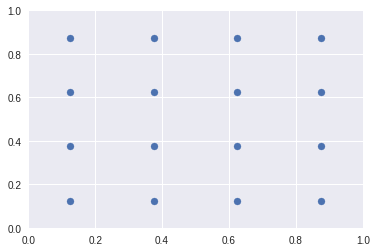

In [0]:
plt.scatter(def_box.cpu()[:, 0], def_box.cpu()[:, 1])
plt.xlim(0, 1)
plt.ylim(0, 1)

In [0]:
# (cx, cy, w, h) -> (x, y, x`, y`)
def def_box_to_bb(cxy, wh): return torch.cat([cxy - wh/2, cxy + wh/2], 1)
# (x, y, x`, y`) -> (x, y, w, h)
def def_box_from_bb(xy, xy2): return torch.cat([xy, xy2 - xy], 1)

In [0]:
def_box_bb = def_box_to_bb(def_box[:, :2], def_box[:, 2:])
def_box_bb

tensor([[0.0000, 0.0000, 0.2500, 0.2500],
        [0.0000, 0.2500, 0.2500, 0.5000],
        [0.0000, 0.5000, 0.2500, 0.7500],
        [0.0000, 0.7500, 0.2500, 1.0000],
        [0.2500, 0.0000, 0.5000, 0.2500],
        [0.2500, 0.2500, 0.5000, 0.5000],
        [0.2500, 0.5000, 0.5000, 0.7500],
        [0.2500, 0.7500, 0.5000, 1.0000],
        [0.5000, 0.0000, 0.7500, 0.2500],
        [0.5000, 0.2500, 0.7500, 0.5000],
        [0.5000, 0.5000, 0.7500, 0.7500],
        [0.5000, 0.7500, 0.7500, 1.0000],
        [0.7500, 0.0000, 1.0000, 0.2500],
        [0.7500, 0.2500, 1.0000, 0.5000],
        [0.7500, 0.5000, 1.0000, 0.7500],
        [0.7500, 0.7500, 1.0000, 1.0000]], device='cuda:0')

(-0.5, 223.5, 223.5, -0.5)

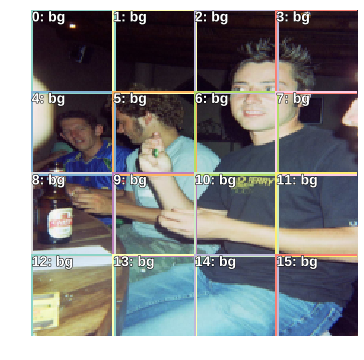

In [0]:
i = 9
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(ima[i])
draw_gt(ax, def_box_bb * sz)
# draw_gt(ax, y[0][i].view(-1, 4), y[1][i])
ax.axis('off')

### Jaccard Index

In [0]:
def box_size(box): return (box[:, 2] - box[:, 0]) * (box[:, 3] - box[:, 1])

def intersection(gt, def_box):
  left_top = torch.max(gt[:, None, :2], def_box[None, :, :2])
  right_bottom = torch.min(gt[:, None, 2:], def_box[None, :, 2:])
  wh = torch.clamp(right_bottom - left_top, min=0)
  return wh[:, :, 0] * wh[:, :, 1]
  
def jaccard(gt, def_box):
  inter = intersection(gt, def_box)
  union = box_size(gt).unsqueeze(1) + box_size(def_box).unsqueeze(0) - inter
  return inter / union

In [0]:
bb, clas = y[0][i].view(-1, 4), y[1][i]
idxs = np.nonzero(bb[:, 2] > 0)[:, 0]
bb, clas = bb[idxs], clas[idxs]
bb, clas

(tensor([[105.,   4., 161.,  28.],
         [ 70.,   0., 149.,  66.],
         [ 50.,  24., 185., 129.],
         [ 19.,  60., 223., 222.]], device='cuda:0'),
 tensor([ 4, 14, 14, 14], device='cuda:0'))

In [0]:
overlap = jaccard(bb, def_box_bb * sz)
overlap

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0390, 0.0000, 0.0000, 0.0000, 0.3559,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3921, 0.0530, 0.0000, 0.0000, 0.3300,
         0.0464, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0112, 0.0198, 0.0059, 0.0000, 0.1155, 0.2212, 0.0582, 0.0000, 0.1155,
         0.2212, 0.0582, 0.0000, 0.0324, 0.0582, 0.0170, 0.0000],
        [0.0000, 0.0562, 0.0607, 0.0584, 0.0000, 0.0875, 0.0949, 0.0912, 0.0000,
         0.0875, 0.0949, 0.0912, 0.0000, 0.0858, 0.0930, 0.0894]],
       device='cuda:0')

In [0]:
gt_best_overlap, gt_db_idx = overlap.max(1)
gt_best_overlap, gt_db_idx

(tensor([0.3559, 0.3921, 0.2212, 0.0949], device='cuda:0'),
 tensor([ 8,  4,  9, 10], device='cuda:0'))

In [0]:
db_best_overlap, db_gt_idx = overlap.max(0)
db_best_overlap, db_gt_idx

(tensor([0.0112, 0.0562, 0.0607, 0.0584, 0.3921, 0.2212, 0.0949, 0.0912, 0.3559,
         0.2212, 0.0949, 0.0912, 0.0324, 0.0858, 0.0930, 0.0894],
        device='cuda:0'),
 tensor([2, 3, 3, 3, 1, 2, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3], device='cuda:0'))

In [0]:
db_best_overlap[gt_db_idx] = 1.1
db_best_overlap

tensor([0.0112, 0.0562, 0.0607, 0.0584, 1.1000, 0.2212, 0.0949, 0.0912, 1.1000,
        1.1000, 1.1000, 0.0912, 0.0324, 0.0858, 0.0930, 0.0894],
       device='cuda:0')

In [0]:
is_obj = db_best_overlap > 0.5
pos_idxs = np.nonzero(is_obj)[:, 0]
neg_idxs = np.nonzero(1 - is_obj)[:, 0]
pos_idxs, neg_idxs

(tensor([ 4,  8,  9, 10], device='cuda:0'),
 tensor([ 0,  1,  2,  3,  5,  6,  7, 11, 12, 13, 14, 15], device='cuda:0'))

In [0]:
db_clas = T([num_classes] * len(db_best_overlap))
db_clas[pos_idxs] = clas[db_gt_idx[pos_idxs]]
db_clas

tensor([20, 20, 20, 20, 14, 20, 20, 20,  4, 14, 14, 20, 20, 20, 20, 20],
       device='cuda:0')

(-0.5, 223.5, 223.5, -0.5)

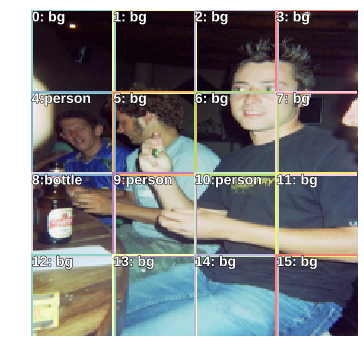

In [0]:
i = 9
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(ima[i])
draw_gt(ax, def_box_bb * sz, db_clas, num_classes=num_classes)
ax.axis('off')

### More Default Boxes

In [0]:
cells = np.array([4, 2, 1])
center_offsets = 1 / cells / 2
aspect_ratios = [(1., 1.), (1., .5), (.5, 1.)]
zooms = [0.7, 1., 1.3]
scales = [(o * i, o * j) for o in zooms for i, j in aspect_ratios]
k = len(scales)
k, scales

(9,
 [(0.7, 0.7),
  (0.7, 0.35),
  (0.35, 0.7),
  (1.0, 1.0),
  (1.0, 0.5),
  (0.5, 1.0),
  (1.3, 1.3),
  (1.3, 0.65),
  (0.65, 1.3)])

In [0]:
def_box = []
for off, c in zip(center_offsets, cells):
  cx = np.repeat(np.repeat(np.linspace(off, 1 - off, c), c), k)
  cy = np.repeat(np.tile(np.linspace(off, 1 - off, c), c), k)
  w =  np.tile([off * 2 * o for o, _ in scales], c**2)
  h =  np.tile([off * 2 * o for _, o in scales], c**2)
  def_box.append(np.stack([cx, cy, w, h], 1))
def_box = T(np.concatenate(def_box))
def_box

tensor([[0.1250, 0.1250, 0.1750, 0.1750],
        [0.1250, 0.1250, 0.1750, 0.0875],
        [0.1250, 0.1250, 0.0875, 0.1750],
        [0.1250, 0.1250, 0.2500, 0.2500],
        [0.1250, 0.1250, 0.2500, 0.1250],
        [0.1250, 0.1250, 0.1250, 0.2500],
        [0.1250, 0.1250, 0.3250, 0.3250],
        [0.1250, 0.1250, 0.3250, 0.1625],
        [0.1250, 0.1250, 0.1625, 0.3250],
        [0.1250, 0.3750, 0.1750, 0.1750],
        [0.1250, 0.3750, 0.1750, 0.0875],
        [0.1250, 0.3750, 0.0875, 0.1750],
        [0.1250, 0.3750, 0.2500, 0.2500],
        [0.1250, 0.3750, 0.2500, 0.1250],
        [0.1250, 0.3750, 0.1250, 0.2500],
        [0.1250, 0.3750, 0.3250, 0.3250],
        [0.1250, 0.3750, 0.3250, 0.1625],
        [0.1250, 0.3750, 0.1625, 0.3250],
        [0.1250, 0.6250, 0.1750, 0.1750],
        [0.1250, 0.6250, 0.1750, 0.0875],
        [0.1250, 0.6250, 0.0875, 0.1750],
        [0.1250, 0.6250, 0.2500, 0.2500],
        [0.1250, 0.6250, 0.2500, 0.1250],
        [0.1250, 0.6250, 0.1250, 0

In [0]:
def_box_bb = def_box_to_bb(def_box[:, :2], def_box[:, 2:])
def_box_bb

tensor([[ 0.0375,  0.0375,  0.2125,  0.2125],
        [ 0.0375,  0.0812,  0.2125,  0.1688],
        [ 0.0812,  0.0375,  0.1688,  0.2125],
        [ 0.0000,  0.0000,  0.2500,  0.2500],
        [ 0.0000,  0.0625,  0.2500,  0.1875],
        [ 0.0625,  0.0000,  0.1875,  0.2500],
        [-0.0375, -0.0375,  0.2875,  0.2875],
        [-0.0375,  0.0438,  0.2875,  0.2062],
        [ 0.0438, -0.0375,  0.2062,  0.2875],
        [ 0.0375,  0.2875,  0.2125,  0.4625],
        [ 0.0375,  0.3313,  0.2125,  0.4187],
        [ 0.0812,  0.2875,  0.1688,  0.4625],
        [ 0.0000,  0.2500,  0.2500,  0.5000],
        [ 0.0000,  0.3125,  0.2500,  0.4375],
        [ 0.0625,  0.2500,  0.1875,  0.5000],
        [-0.0375,  0.2125,  0.2875,  0.5375],
        [-0.0375,  0.2937,  0.2875,  0.4563],
        [ 0.0438,  0.2125,  0.2062,  0.5375],
        [ 0.0375,  0.5375,  0.2125,  0.7125],
        [ 0.0375,  0.5813,  0.2125,  0.6687],
        [ 0.0812,  0.5375,  0.1688,  0.7125],
        [ 0.0000,  0.5000,  0.2500

In [0]:
grid_size = T(np.concatenate([[1./c] * c**2 * k for c in cells])[:, None])
grid_size

tensor([[0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0.2500],
        [0

In [0]:
overlap = jaccard(bb, def_box_bb * sz)
gt_best_overlap, gt_db_idx = overlap.max(1)
db_best_overlap, db_gt_idx = overlap.max(0)
db_best_overlap[gt_db_idx] = 1.1
is_obj = db_best_overlap > 0.5
pos_idxs = np.nonzero(is_obj)[:, 0]
neg_idxs = np.nonzero(1 - is_obj)[:, 0]
db_clas = T([num_classes] * len(db_best_overlap))
db_clas[pos_idxs] = clas[db_gt_idx[pos_idxs]]
db_best_overlap, db_clas

(tensor([0.0000, 0.0000, 0.0000, 0.0112, 0.0069, 0.0000, 0.0308, 0.0194, 0.0034,
         0.0335, 0.0169, 0.0223, 0.0562, 0.0309, 0.0358, 0.0770, 0.0485, 0.0482,
         0.0335, 0.0169, 0.0223, 0.0607, 0.0309, 0.0386, 0.0943, 0.0485, 0.0587,
         0.0335, 0.0169, 0.0223, 0.0584, 0.0309, 0.0372, 0.0798, 0.0485, 0.0499,
         0.2424, 0.1237, 0.1474, 0.3921, 0.2098, 0.3007, 1.1000, 0.3043, 0.3581,
         0.1084, 0.0542, 0.0542, 0.2212, 0.1106, 0.1106, 0.3572, 0.1797, 0.1869,
         0.0465, 0.0232, 0.0232, 0.0949, 0.0474, 0.0474, 0.1604, 0.0802, 0.0802,
         0.0465, 0.0232, 0.0232, 0.0912, 0.0474, 0.0457, 0.1344, 0.0802, 0.0680,
         1.1000, 0.2223, 0.2223, 0.3559, 0.3082, 0.3000, 0.3852, 0.3426, 0.2866,
         0.1084, 0.0542, 0.0542, 0.2212, 0.1106, 0.1106, 0.3739, 0.1869, 0.1869,
         0.0465, 0.0232, 0.0232, 0.0949, 0.0474, 0.0474, 0.1604, 0.0802, 0.0802,
         0.0465, 0.0232, 0.0232, 0.0912, 0.0474, 0.0457, 0.1344, 0.0802, 0.0680,
         0.0131, 0.0080, 0.0

(-0.5, 223.5, 223.5, -0.5)

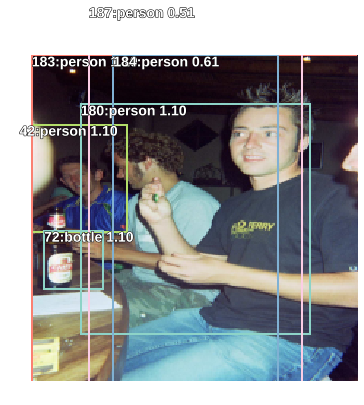

In [0]:
i = 9
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(ima[i])
draw_gt(ax, def_box_bb * sz, db_clas, prob=db_best_overlap, num_classes=num_classes)
ax.axis('off')

### Train 4x4

In [0]:
cells = 4
width = 1 / cells
cx = np.repeat(np.linspace(width / 2, 1 - (width / 2), cells), cells)
cy = np.tile(np.linspace(width / 2, 1 - (width / 2), cells), cells)
w = h = np.array([width] * cells**2)
def_box = V(np.stack([cx, cy, w, h], 1))
def_box_bb = def_box_to_bb(def_box[:, :2], def_box[:, 2:])
grid_size = T([width] * cells**2)
def_box, def_box_bb, grid_size

(tensor([[0.1250, 0.1250, 0.2500, 0.2500],
         [0.1250, 0.3750, 0.2500, 0.2500],
         [0.1250, 0.6250, 0.2500, 0.2500],
         [0.1250, 0.8750, 0.2500, 0.2500],
         [0.3750, 0.1250, 0.2500, 0.2500],
         [0.3750, 0.3750, 0.2500, 0.2500],
         [0.3750, 0.6250, 0.2500, 0.2500],
         [0.3750, 0.8750, 0.2500, 0.2500],
         [0.6250, 0.1250, 0.2500, 0.2500],
         [0.6250, 0.3750, 0.2500, 0.2500],
         [0.6250, 0.6250, 0.2500, 0.2500],
         [0.6250, 0.8750, 0.2500, 0.2500],
         [0.8750, 0.1250, 0.2500, 0.2500],
         [0.8750, 0.3750, 0.2500, 0.2500],
         [0.8750, 0.6250, 0.2500, 0.2500],
         [0.8750, 0.8750, 0.2500, 0.2500]], device='cuda:0'),
 tensor([[0.0000, 0.0000, 0.2500, 0.2500],
         [0.0000, 0.2500, 0.2500, 0.5000],
         [0.0000, 0.5000, 0.2500, 0.7500],
         [0.0000, 0.7500, 0.2500, 1.0000],
         [0.2500, 0.0000, 0.5000, 0.2500],
         [0.2500, 0.2500, 0.5000, 0.5000],
         [0.2500, 0.5000, 0.5000, 0

In [0]:
class BCELoss(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.num_classes = num_classes
    
  def get_weight(self, x, t): return None
  
  def forward(self, x, t):
    x = x[:, :-1]
    one_hot_t = torch.eye(num_classes + 1)[t.data.cpu()]
    t = V(one_hot_t[:, :-1].contiguous())
    w = self.get_weight(x, t)
    return F.binary_cross_entropy_with_logits(x, t, w, size_average=False) / self.num_classes

bce_loss_f = BCELoss(num_classes)

In [0]:
def loc_loss(preds, targs):
  return (preds - targs).abs().mean()

def conf_loss(preds, targs):
  return bce_loss_f(preds, targs)
  
def offset_to_bb(off, db_bb):
    off = F.tanh(off)
    center = (off[:, :2] / 2) * db_bb[:, 2:] + db_bb[:, :2]
    wh = ((off[:, 2:] / 2) + 1) * db_bb[:, 2:]
    return def_box_to_bb(center, wh)

def _ssd_loss(db_offset, clas, bb_gt, clas_gt):
  bb = offset_to_bb(db_offset, def_box)
  bb_gt = bb_gt.view(-1, 4) / sz
  idxs = np.nonzero(bb_gt[:, 2] > 0)[:, 0]
  bb_gt, clas_gt = bb_gt[idxs], clas_gt[idxs]
  overlap = jaccard(bb_gt, def_box_bb)
  gt_best_overlap, gt_db_idx = overlap.max(1)
  db_best_overlap, db_gt_idx = overlap.max(0)
  db_best_overlap[gt_db_idx] = 1.1
  for i, o in enumerate(gt_db_idx): db_gt_idx[o] = i
  is_obj = db_best_overlap >= 0.5
  pos_idxs = np.nonzero(is_obj)[:, 0]
  neg_idxs = np.nonzero(1 - is_obj.data)[:, 0]
  db_clas = clas_gt[db_gt_idx]
  db_clas[neg_idxs] = len(labels)
  db_bb = bb_gt[db_gt_idx]
  return (loc_loss(bb[pos_idxs], db_bb[pos_idxs]), bce_loss_f(clas, db_clas))

def ssd_loss(preds, targs, print_loss=False):
#   alpha = 1.
  loc_loss, conf_loss = 0., 0.
  for i, (db_offset, clas, bb_gt, clas_gt) in enumerate(zip(*preds, *targs)):
    losses = _ssd_loss(db_offset, clas, bb_gt, clas_gt)
    loc_loss += losses[0]# * alpha
    conf_loss += losses[1]
  if print_loss:
    print(f'loc loss: {loc_loss:.2f}, conf loss: {conf_loss:.2f}')
  return loc_loss + conf_loss

In [0]:
x, y = next(iter(md.trn_dl))
x, y = V(x), V(y)
yp = predict_batch(learn.model, x)
ssd_loss(yp, y)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(81.6845, device='cuda:0', grad_fn=<AddBackward0>)

In [0]:
learn = ConvLearner.pretrained(arch, md, custom_head=ssd_head_f)
learn.opt_fn = optim.Adam
learn.crit = ssd_loss

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


 77%|███████▋  | 69/90 [02:02<00:10,  2.09it/s, loss=200]

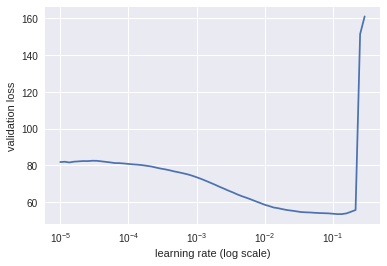

In [0]:
learn.lr_find()
learn.sched.plot(0, 0)

In [0]:
lr = 1e-2
learn.fit(lr, 1, cycle_len=8, use_clr=(20, 5))
learn.save('16')

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch      trn_loss   val_loss   
    0      33.574218  34.117771 
    1      30.093091  29.408577 
    2      27.206728  27.568285 
    3      25.348878  26.957813 
    4      23.976828  26.765239 
    5      22.80882   26.695604 
    6      21.532631  26.688388 
    7      20.018111  26.610572 


In [0]:
x,y = next(iter(md.val_dl))
x,y = V(x),V(y)
learn.model.eval()
b_bb, b_clas = learn.model(x)

(-0.5, 223.5, 223.5, -0.5)

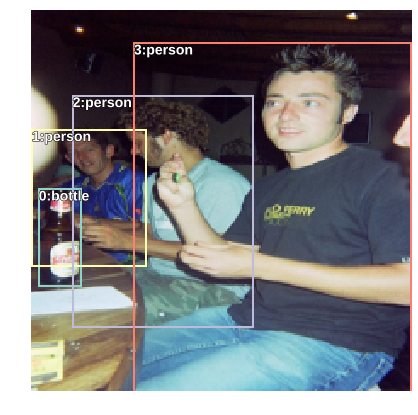

In [0]:
idx=9
b_clasi = b_clas[idx]
b_bboxi = b_bb[idx]
ima=md.val_ds.ds.denorm(to_np(x))[idx]
bb_gt = y[0][idx].view(-1, 4) / sz
idxs = np.nonzero(bb_gt[:, 2] > 0)[:, 0]
bb_gt, clas_gt = bb_gt[idxs], y[1][idx][idxs]
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(ima)
draw_gt(ax, bb_gt.data * sz, clas_gt.data, num_classes=num_classes)
ax.axis('off')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


(-0.5, 223.5, 223.5, -0.5)

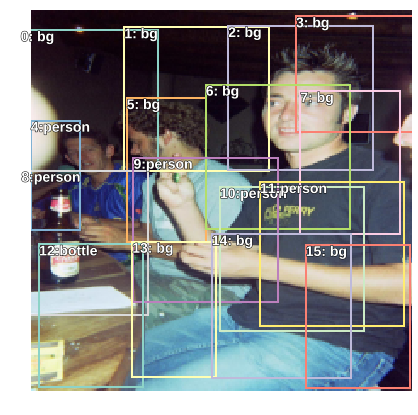

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(ima)
bb = offset_to_bb(b_bboxi, def_box)
draw_gt(ax, bb * sz, b_clasi.data.max(1)[1], num_classes=num_classes)
ax.axis('off')

### SSD Network Part 2

In [0]:
cells = np.array([4, 2, 1])
center_offsets = 1 / cells / 2
aspect_ratios = [(1., 1.), (1., .5), (.5, 1.)]
zooms = [0.7, 1., 1.3]
scales = [(o * i, o * j) for o in zooms for i, j in aspect_ratios]
k = len(scales)

def_box = []
for off, c in zip(center_offsets, cells):
  cx = np.repeat(np.repeat(np.linspace(off, 1 - off, c), c), k)
  cy = np.repeat(np.tile(np.linspace(off, 1 - off, c), c), k)
  w =  np.tile([off * 2 * o for o, _ in scales], c**2)
  h =  np.tile([off * 2 * o for _, o in scales], c**2)
  def_box.append(np.stack([cx, cy, w, h], 1))
def_box = T(np.concatenate(def_box))
def_box_bb = def_box_to_bb(def_box[:, :2], def_box[:, 2:])

grid_size = T(np.concatenate([[1./c] * c**2 * k for c in cells])[:, None])

k, scales, def_box, def_box_bb, grid_size

(9,
 [(0.7, 0.7),
  (0.7, 0.35),
  (0.35, 0.7),
  (1.0, 1.0),
  (1.0, 0.5),
  (0.5, 1.0),
  (1.3, 1.3),
  (1.3, 0.65),
  (0.65, 1.3)],
 tensor([[0.1250, 0.1250, 0.1750, 0.1750],
         [0.1250, 0.1250, 0.1750, 0.0875],
         [0.1250, 0.1250, 0.0875, 0.1750],
         [0.1250, 0.1250, 0.2500, 0.2500],
         [0.1250, 0.1250, 0.2500, 0.1250],
         [0.1250, 0.1250, 0.1250, 0.2500],
         [0.1250, 0.1250, 0.3250, 0.3250],
         [0.1250, 0.1250, 0.3250, 0.1625],
         [0.1250, 0.1250, 0.1625, 0.3250],
         [0.1250, 0.3750, 0.1750, 0.1750],
         [0.1250, 0.3750, 0.1750, 0.0875],
         [0.1250, 0.3750, 0.0875, 0.1750],
         [0.1250, 0.3750, 0.2500, 0.2500],
         [0.1250, 0.3750, 0.2500, 0.1250],
         [0.1250, 0.3750, 0.1250, 0.2500],
         [0.1250, 0.3750, 0.3250, 0.3250],
         [0.1250, 0.3750, 0.3250, 0.1625],
         [0.1250, 0.3750, 0.1625, 0.3250],
         [0.1250, 0.6250, 0.1750, 0.1750],
         [0.1250, 0.6250, 0.1750, 0.0875],
     

In [0]:
nf = 256
num_classes = len(labels)

def conv_layer(nin, nf, stride=2, drop=0.1):
  return nn.Sequential(
      nn.Conv2d(nin, nf, 3, stride, 1, bias=False),
      nn.ReLU(),
      nn.BatchNorm2d(nf),
      nn.Dropout(drop)
  )

class Outlayer(nn.Module):
  def __init__(self, nf, num_classes, bias):
    super().__init__()
    self.clas_conv = nn.Conv2d(nf, (num_classes + 1) * k, 3, 1, 1)
    self.bb_conv = nn.Conv2d(nf, 4 * k, 3, 1, 1)
    self.clas_conv.bias.data.zero_().add_(bias)
  
  def flatten(self, x):
    bs, nf, w, h = x.size()
    x = x.permute(0, 2, 3, 1).contiguous()
    return x.view(bs, -1, nf // k)
  
  def forward(self, x):
    return [self.flatten(self.bb_conv(x)), self.flatten(self.clas_conv(x))]

class SSDHead(nn.Module):
  def __init__(self, num_classes, nf, bias, drop_i=0.25, drop_h=0.1):
    super().__init__()
    self.conv1 = conv_layer(512, nf, stride=1, drop=drop_h)
    self.conv2 = conv_layer(nf, nf, drop=drop_h)   # 4x4
    self.conv3 = conv_layer(nf, nf, drop=drop_h)   # 2x2
    self.conv4 = conv_layer(nf, nf, drop=drop_h)   # 1x1
    self.drop_i = nn.Dropout(drop_i)
    self.out1 = Outlayer(nf, num_classes, bias)
    self.out2 = Outlayer(nf, num_classes, bias)
    self.out3 = Outlayer(nf, num_classes, bias)
  
  def forward(self, x):
    x = self.drop_i(F.relu(x))
    x = self.conv1(x)
    x = self.conv2(x)
    bb1, clas1 = self.out1(x)
    x = self.conv3(x)
    bb2, clas2 = self.out2(x)
    x = self.conv4(x)
    bb3, clas3 = self.out3(x)
    return [torch.cat([bb1, bb2, bb3], 1),
            torch.cat([clas1, clas2, clas3], 1)]

drops = [0.4, 0.2]
ssd_head_f = SSDHead(num_classes, nf, -4., drop_i=drops[0], drop_h=drops[1])

In [0]:
models = ConvnetBuilder(arch, 0, 0, 0, custom_head=ssd_head_f)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = ssd_loss
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape

In [0]:
x, y = next(iter(md.trn_dl))
yp = predict_batch(learn.model, x)
ssd_loss(yp, y)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(287.4339, device='cuda:0', grad_fn=<AddBackward0>)

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


 80%|████████  | 72/90 [02:03<00:09,  1.95it/s, loss=553]

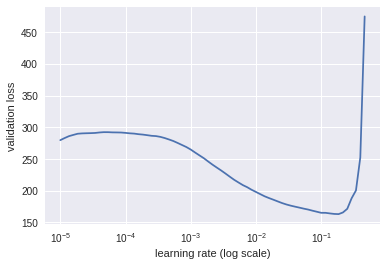

In [0]:
learn.lr_find()
learn.sched.plot(0, 0)

In [0]:
lr = 1e-2
learn.fit(lr, 1, cycle_len=10, use_clr=(20, 10))
learn.save('multi')

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch      trn_loss   val_loss   
    0      87.026507  75.858966 
    1      68.657919  62.675859 
    2      58.815842  78.257847 
    3      53.675965  54.85459  
    4      49.656684  53.707109 
    5      46.777794  53.003534 
    6      44.20865   51.358076 
    7      41.394307  51.515281 
    8      38.741202  50.559135 
    9      36.69472   50.12559  


In [0]:
x,y = next(iter(md.val_dl))
x,y = V(x),V(y)
learn.model.eval()
b_bb, b_clas = learn.model(x)

idx=9
b_clasi = b_clas[idx]
b_bboxi = b_bb[idx]
ima=md.val_ds.ds.denorm(to_np(x))[idx]
bb = offset_to_bb(b_bboxi, def_box)

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(ima)
draw_gt(ax, bb * sz, b_clasi.data.max(1)[1], num_classes=num_classes)
ax.axis('off')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


(-0.5, 223.5, 223.5, -0.5)

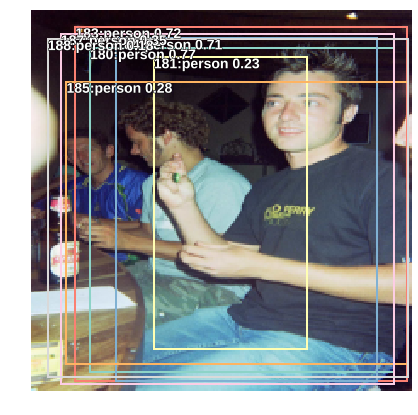

In [0]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(ima)
draw_gt(ax, bb * sz, b_clasi.data.max(1)[1], num_classes=num_classes, prob=F.sigmoid(b_clasi).max(1)[0], thresh=0.15)
ax.axis('off')

### NMS

In [0]:
def nms(boxes, scores, overlap=0.5, top_k=100):
    keep = scores.new(scores.size(0)).zero_().long()
    if boxes.numel() == 0: return keep
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = torch.mul(x2 - x1, y2 - y1)
    v, idx = scores.sort(0)  # sort in ascending order
    idx = idx[-top_k:]  # indices of the top-k largest vals
    xx1 = boxes.new()
    yy1 = boxes.new()
    xx2 = boxes.new()
    yy2 = boxes.new()
    w = boxes.new()
    h = boxes.new()

    count = 0
    while idx.numel() > 0:
        i = idx[-1]  # index of current largest val
        keep[count] = i
        count += 1
        if idx.size(0) == 1: break
        idx = idx[:-1]  # remove kept element from view
        # load bboxes of next highest vals
        torch.index_select(x1, 0, idx, out=xx1)
        torch.index_select(y1, 0, idx, out=yy1)
        torch.index_select(x2, 0, idx, out=xx2)
        torch.index_select(y2, 0, idx, out=yy2)
        # store element-wise max with next highest score
        xx1 = torch.clamp(xx1, min=x1[i])
        yy1 = torch.clamp(yy1, min=y1[i])
        xx2 = torch.clamp(xx2, max=x2[i])
        yy2 = torch.clamp(yy2, max=y2[i])
        w.resize_as_(xx2)
        h.resize_as_(yy2)
        w = xx2 - xx1
        h = yy2 - yy1
        # check sizes of xx1 and xx2.. after each iteration
        w = torch.clamp(w, min=0.0)
        h = torch.clamp(h, min=0.0)
        inter = w*h
        # IoU = i / (area(a) + area(b) - i)
        rem_areas = torch.index_select(area, 0, idx)  # load remaining areas)
        union = (rem_areas - inter) + area[i]
        IoU = inter/union  # store result in iou
        # keep only elements with an IoU <= overlap
        idx = idx[IoU.le(overlap)]
    return keep, count

In [0]:
x,y = next(iter(md.val_dl))
y = V(y)
batch = learn.model(V(x))
b_bb, b_clas = batch
x = to_np(x)

In [0]:
def show_nmf(idx, thresh=0.15):
    ima=md.val_ds.ds.denorm(x)[idx]
    bb_gt = y[0][idx].view(-1, 4) / sz
    idxs = np.nonzero(bb_gt[:, 2] > 0)[:, 0]
    bb_gt, clas_gt = bb_gt[idxs], y[1][idx][idxs]
    bb = offset_to_bb(b_bb[idx], def_box)
    clas_pr, clas_ids = b_clas[idx].max(1)
    clas_pr = clas_pr.sigmoid()

    conf_scores = b_clas[idx].sigmoid().t().data

    out1,out2,cc = [],[],[]
    for cl in range(0, len(conf_scores)-1):
        c_mask = conf_scores[cl] > thresh
        if c_mask.sum() == 0: continue
        scores = conf_scores[cl][c_mask]
        l_mask = c_mask.unsqueeze(1).expand_as(bb)
        boxes = bb[l_mask].view(-1, 4)
        ids, count = nms(boxes.data, scores, 0.4, 50)
        ids = ids[:count]
        out1.append(scores[ids])
        out2.append(boxes.data[ids])
        cc.append([cl]*count)
    if not cc:
        print(f"{i}: empty array")
        return
    cc = T(np.concatenate(cc))
    out1 = torch.cat(out1)
    out2 = torch.cat(out2)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(ima)
    draw_gt(ax, out2 * sz, cc, num_classes=num_classes, prob=out1, thresh=0.1)
    ax.axis('off')
#     torch_gt(ax, ima, out2, cc, out1, 0.1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


0: empty array


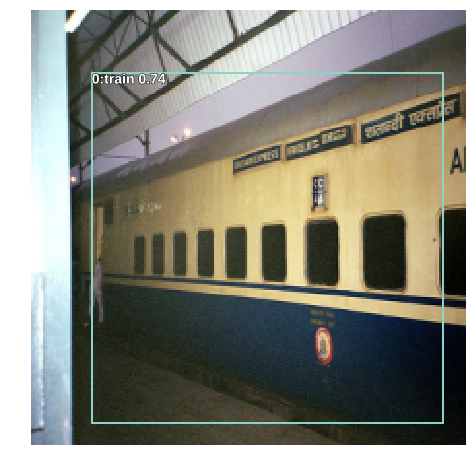

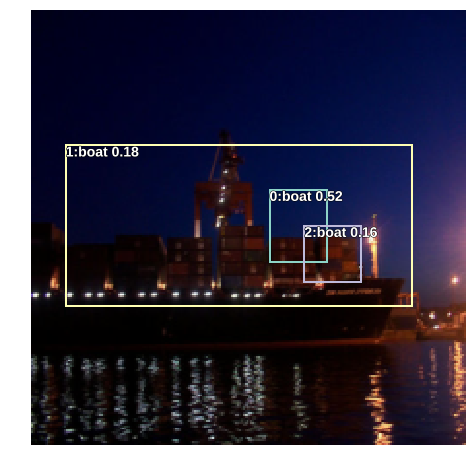

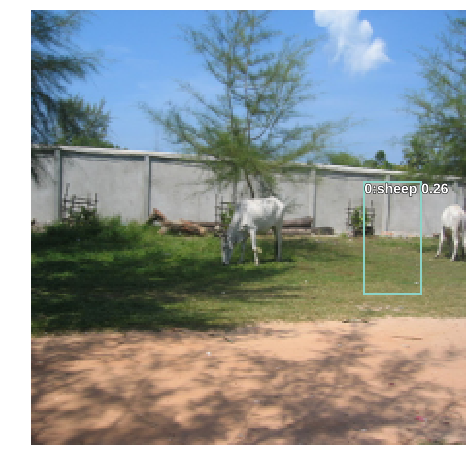

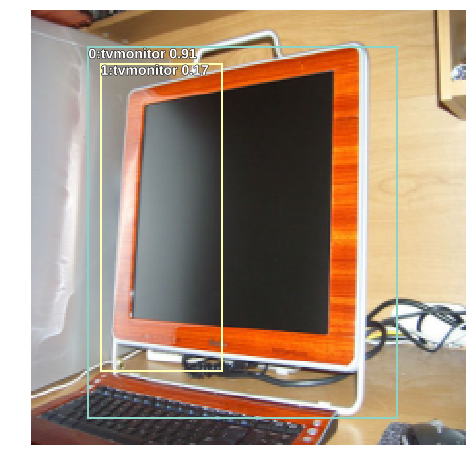

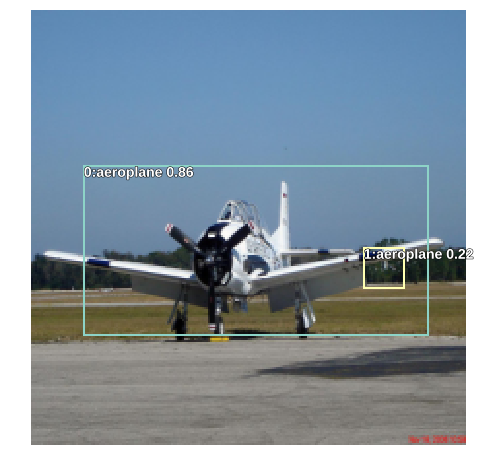

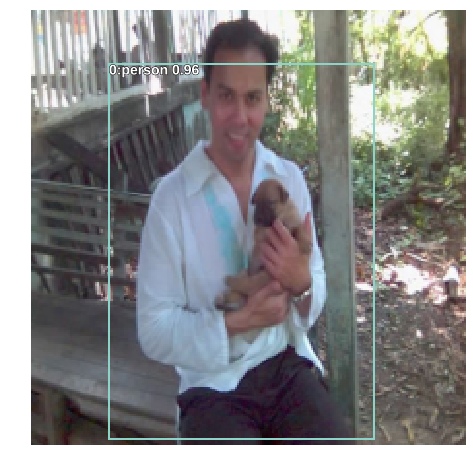

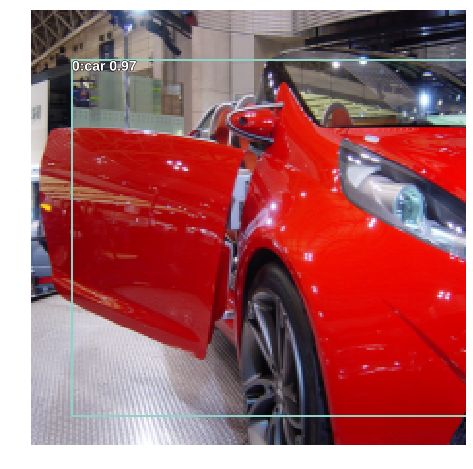

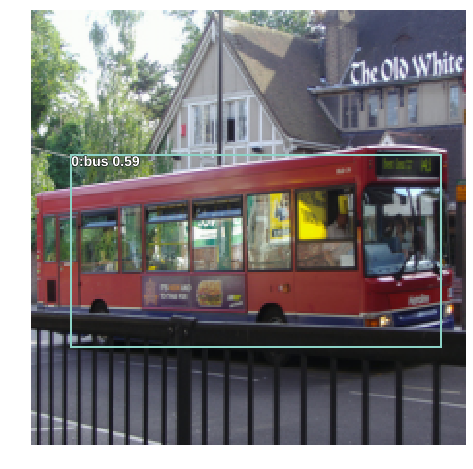

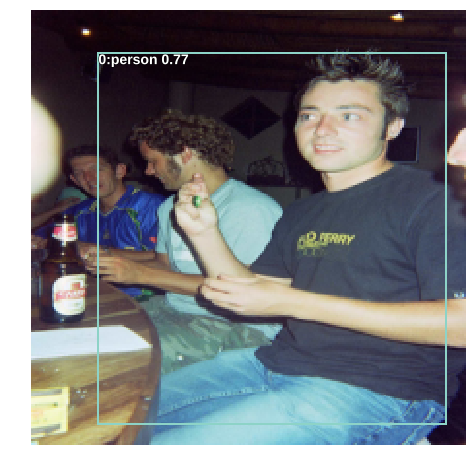

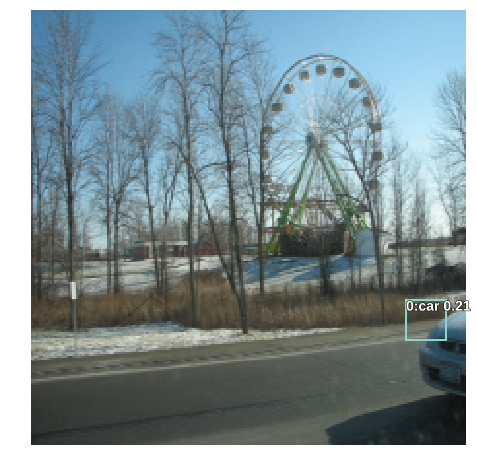

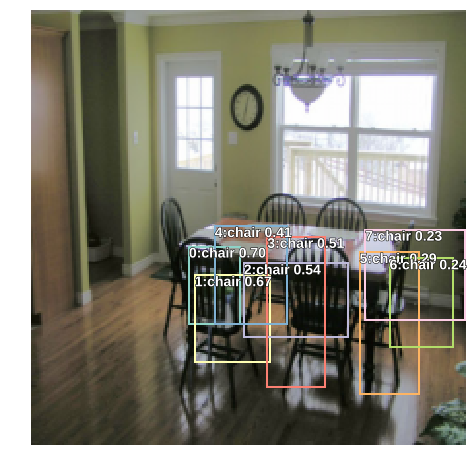

In [0]:
for i in range(12): show_nmf(i)

In [0]:
x, y = next(iter(md.trn_dl))
yp = predict_batch(learn.model, x)
ssd_loss(yp, y, True)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


loc loss: 3.65, conf loss: 28.08


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(31.7384, device='cuda:0', grad_fn=<AddBackward0>)

### Focal Loss

In [0]:
class FocalLoss(nn.Module):
  def __init__(self, num_classes):
    super().__init__()
    self.num_classes = num_classes
    
  def get_weight(self, x, t):
    alpha,gamma = 0.25,1
    p = x.sigmoid()
    pt = p*t + (1-p)*(1-t)
    w = alpha*t + (1-alpha)*(1-t)
    return w * (1-pt).pow(gamma)
  
  def forward(self, x, t):
    x = x[:, :-1]
    one_hot_t = torch.eye(num_classes + 1)[t.data.cpu()]
    t = V(one_hot_t[:, :-1].contiguous())
    w = self.get_weight(V(x), V(t))
    return F.binary_cross_entropy_with_logits(x, t, w, size_average=False) / self.num_classes

bce_loss_f = FocalLoss(num_classes)

In [0]:
x, y = next(iter(md.trn_dl))
x, y = V(x), V(y)
yp = predict_batch(learn.model, x)
ssd_loss(yp, y)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(10.5473, device='cuda:0', grad_fn=<AddBackward0>)

In [0]:
drops = [0.4, 0.3]
ssd_head_f = SSDHead(num_classes, nf, -4., drop_i=drops[0], drop_h=drops[1])
models = ConvnetBuilder(arch, 0, 0, 0, custom_head=ssd_head_f)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = ssd_loss
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 224, 224]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(9408))])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('trainable', False),
                           ('nb_params', tensor(128))])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 112, 112]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 112, 112]),
                           ('output_shape', [-1, 64, 56, 56]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


 73%|███████▎  | 66/90 [02:04<00:13,  1.84it/s, loss=76.2]

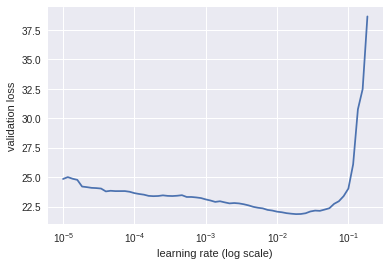

In [0]:
learn.lr_find()
learn.sched.plot(0, 0)

In [0]:
lr = 1e-2
learn.fit(lr, 1, cycle_len=10, use_clr=(20, 10))
learn.save('focal_loss')

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch      trn_loss   val_loss   
    0      17.30767   18.866698 
    1      15.211579  13.772004 
    2      13.563804  13.015255 
    3      12.589626  12.785115 
    4      11.926406  12.28807  
    5      11.515744  11.814605 
    6      11.109133  11.686357 
    7      10.664063  11.424233 
    8      10.285392  11.338397 
    9      9.935587   11.185435 


In [0]:
drops = [0.4, 0.4]
ssd_head_f = SSDHead(num_classes, nf, -4., drop_i=drops[0], drop_h=drops[1])
models = ConvnetBuilder(arch, 0, 0, 0, custom_head=ssd_head_f)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = ssd_loss
learn.load('focal_loss')

In [0]:
learn.freeze_to(-2)
learn.fit(lr/4, 1, cycle_len=10, use_clr=(20, 10))
learn.save('focal_loss-2')

  0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch      trn_loss   val_loss   
    0      12.697291  13.894148 
    1      12.30151   12.959271 
    2      11.377315  12.223762 
    3      10.876366  11.95752  
    4      10.325061  11.09771  
    5      9.747867   11.102276 
    6      9.317195   10.934855 
    7      8.848167   10.552236 
    8      8.577048   10.396601 
    9      8.15503    10.254623 


In [0]:
x,y = next(iter(md.val_dl))
y = V(y)
batch = learn.model(V(x))
b_bb, b_clas = batch
x = to_np(x)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


3: empty array
10: empty array


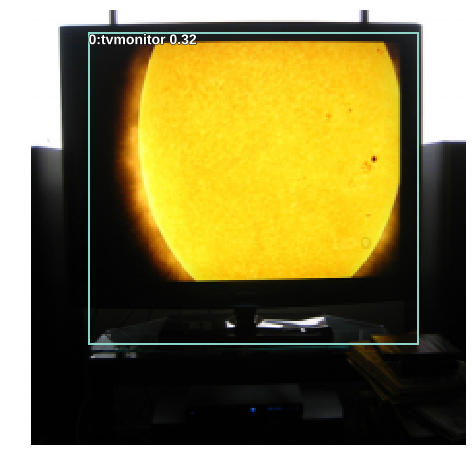

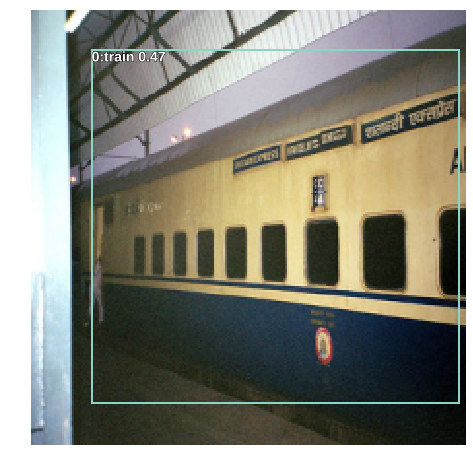

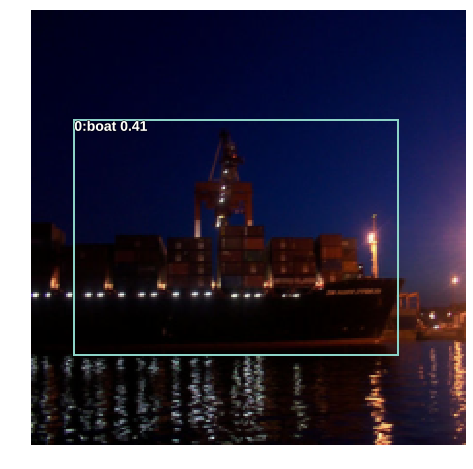

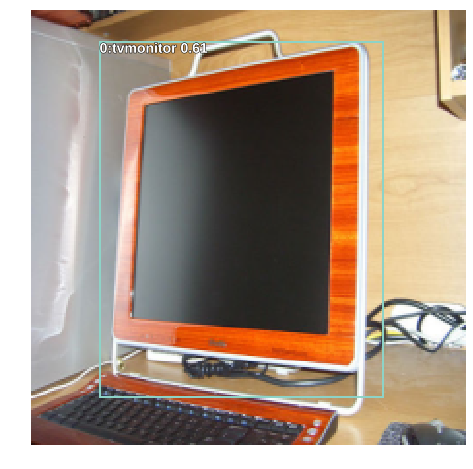

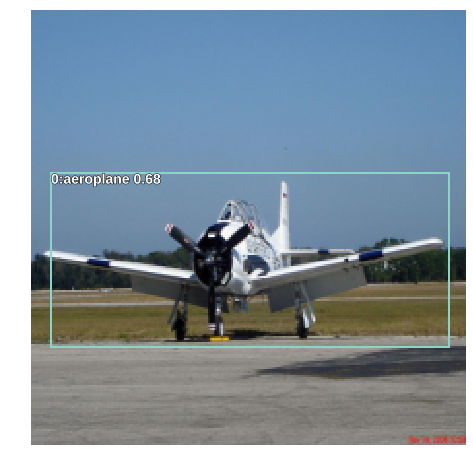

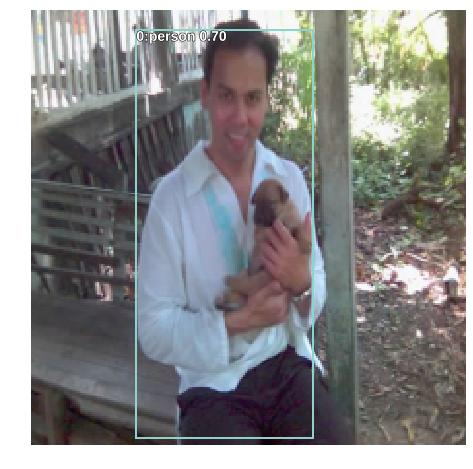

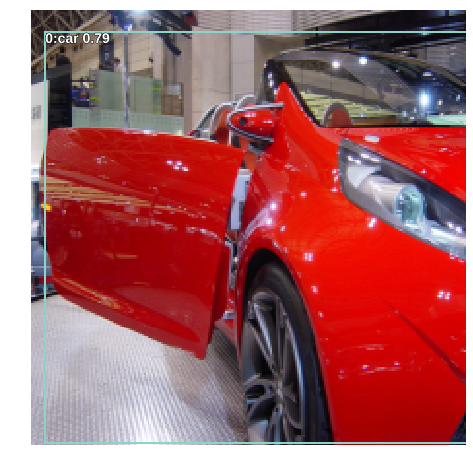

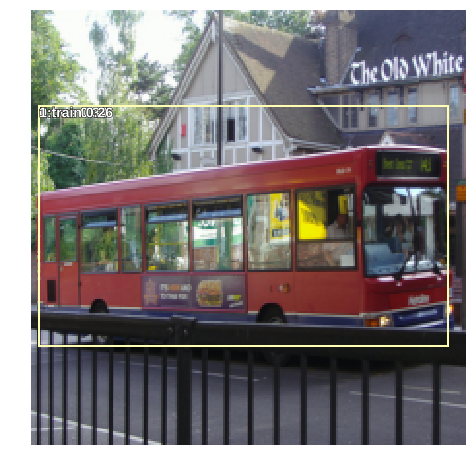

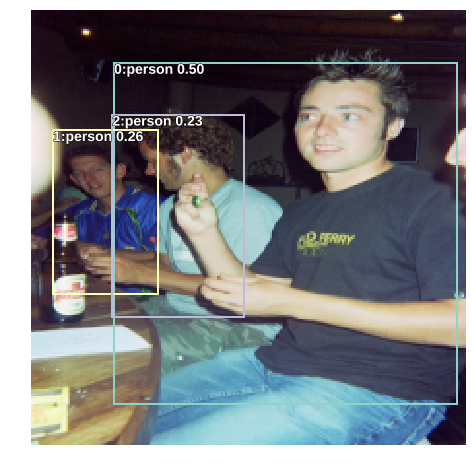

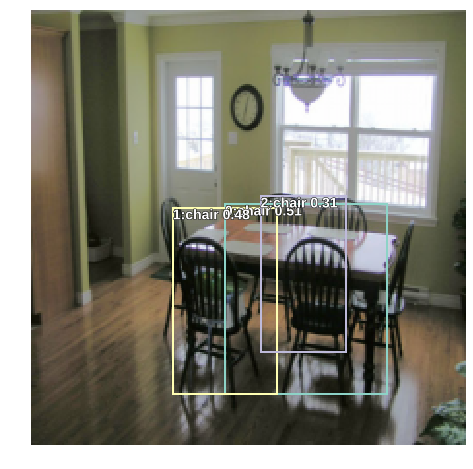

In [0]:
for i in range(12): show_nmf(i, thresh=0.2)

## END